Yashwee Kothari and Vanshika Shah 

### Midterm project - Kaggle exercise project

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Goals

* Get familar with Kaggle competition since our final project may be a real Kaggle competition.
* Practice on large data set
* Data quality checking, missing data imputation
* Feature selection. What's your rationals to choose those features.
* Create at least 5 new features and explain your reason for every new features.
* Use feature importance to help you choose 10 features
* Choose 3 ML algorithms we covered in the class to build your prediction models
* For each model you build, you will need to evaluate and show your effort to improve it.
* Your jupyter submission should be in an article quality. Do NOT print huge data set in the notebook. Use head(). Use plotting to visualize your analysis and results. Use markdown to write your comments.
* Your score is based on completeness on every step.
* Submit in HTML and ipynb format on canvas

In [520]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [521]:
train_data = pd.read_csv('train.csv')
train_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [522]:
#selecting features from existing train data
df_feat = train_data[['LotArea', 'YearBuilt', 'OverallQual',
                              'OverallCond','CentralAir','BsmtQual', 'GrLivArea', 
                              'TotRmsAbvGrd','YearRemodAdd','SaleCondition','YrSold']]

df_feat.head()

,LotArea,YearBuilt,OverallQual,OverallCond,CentralAir,BsmtQual,GrLivArea,TotRmsAbvGrd,YearRemodAdd,SaleCondition,YrSold
0,8450,2003,7,5,Y,Gd,1710,8,2003,Normal,2008
1,9600,1976,6,8,Y,Gd,1262,6,1976,Normal,2007
2,11250,2001,7,5,Y,Gd,1786,6,2002,Normal,2008
3,9550,1915,7,5,Y,TA,1717,7,1970,Abnorml,2006
4,14260,2000,8,5,Y,Gd,2198,9,2000,Normal,2008


### Reasoning for Choosing Features 
The reason for choosing these features above was seeing which features make the most sense when buying a house. The overall condition and quality of houses would share a positive correlation with the price. The better the quality and condition the higher the price will be. The quality of basement and if there even is a basement is important to the price as those house with basements will be most likely more expensive. The condition of the sale also depends as houses which are foreclosures may be going for much cheaper than normal sales. The year remodeled and the year sold was chosen because because if the remodel was done only little before it got sold then that means the house condition was better. The total rooms were chosen to see how big the house is because the bigger the house or more bathrooms/bedrooms correlates to a higher price.

In [523]:
#See which features have high correlation to Sale Price
corr_matrix = train_data.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

#we can see that Overall Quality has the highest correlation with SalePrice.

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

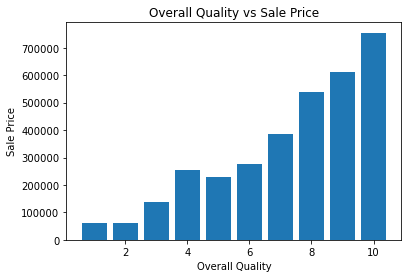

In [524]:
plt.bar(train_data['OverallQual'], train_data['SalePrice'])
plt.title("Overall Quality vs Sale Price")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.show()

#Bar graph shows clear correlation with quality and sale price

In [525]:
#shows which columns have missing data so we can fix it
df_feat.isna().any()

LotArea          False
YearBuilt        False
OverallQual      False
OverallCond      False
CentralAir       False
BsmtQual          True
GrLivArea        False
TotRmsAbvGrd     False
YearRemodAdd     False
SaleCondition    False
YrSold           False
dtype: bool

In [526]:
#replacing NA for no basement and no garage with None before label encoding

df_feat['BsmtQual'].fillna('None',  inplace=True,)

#shows that none of the data columns are NA anymore
df_feat.isna().any()

LotArea          False
YearBuilt        False
OverallQual      False
OverallCond      False
CentralAir       False
BsmtQual         False
GrLivArea        False
TotRmsAbvGrd     False
YearRemodAdd     False
SaleCondition    False
YrSold           False
dtype: bool

In [527]:
#creating the 5 new features and adding to df_feat dataframe 

df_feat['FinishBsmtSF'] = train_data['TotalBsmtSF'] - train_data['BsmtUnfSF']

df_feat['YearsSinceRemodel'] = train_data['YrSold'] - train_data['YearRemodAdd']

df_feat['TotalLivArea'] = train_data['GrLivArea'] + df_feat['FinishBsmtSF'] 

df_feat['TotalRooms'] = train_data['BsmtFullBath'] + train_data['BsmtHalfBath'] + train_data['FullBath'] + train_data['HalfBath']+ train_data['BedroomAbvGr']+ train_data['KitchenAbvGr']

df_feat['TotalExteriorSF'] = train_data['GarageArea'] + train_data['WoodDeckSF'] + train_data['OpenPorchSF'] + train_data['3SsnPorch'] + train_data['ScreenPorch'] + train_data['PoolArea'] 


df_feat.head()

,LotArea,YearBuilt,OverallQual,OverallCond,CentralAir,BsmtQual,GrLivArea,TotRmsAbvGrd,YearRemodAdd,SaleCondition,YrSold,FinishBsmtSF,YearsSinceRemodel,TotalLivArea,TotalRooms,TotalExteriorSF
0,8450,2003,7,5,Y,Gd,1710,8,2003,Normal,2008,706,5,2416,8,609
1,9600,1976,6,8,Y,Gd,1262,6,1976,Normal,2007,978,31,2240,7,758
2,11250,2001,7,5,Y,Gd,1786,6,2002,Normal,2008,486,6,2272,8,650
3,9550,1915,7,5,Y,TA,1717,7,1970,Abnorml,2006,216,36,1933,6,677
4,14260,2000,8,5,Y,Gd,2198,9,2000,Normal,2008,655,8,2853,9,1112


### 5 New Features Created

1. FinishBsmtSF is the total square foot of the basement that is finished. Finished basements are considered liveable space and this could correlate to a higher price or lower price whether or not the basement is finished. 


2. YearsSinceRemodel is the difference between the year it was remodeled and the year it was sold. Houses that are remodeled closer to the year sold will be in a better condition and the ones that are remodeled long before being sold probably are not in the best condition. The ones that never got remodeled will have the most years since remodel. This will correlate to the condition of the house.


3. TotalLivArea is the area of the house plus finished basement square feet area. This shows the total livable area in the house and the higher the square foot area of the house the higher the price.


4. TotalRooms includes not just the rooms above the ground but also if there are bathrooms in the basement. If the basement has bathrooms that means tehy owner has spent money to create rooms and finish it partially. The number of bathrooms and price of the house would correlate. 


5. Total Exterior SF is the total non-living areas outside the house, which includes the backyard space (pool, porches, decks) and garage area. This can be important for sale price because the more exterior features  there are, the more expensive the house will cost as more open space is attractive for buyers. 

In [528]:
#encoding the categorical features
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# generating binary values using get_dummies

copy_df = pd.get_dummies(df_feat["SaleCondition"], columns=['SaleCondition'],  prefix='SaleCond')
df_feat = df_feat.join(copy_df)

copy_df = pd.get_dummies(df_feat["CentralAir"], columns=['CentralAir'], prefix='CentralAir')
df_feat = df_feat.join(copy_df)

copy_df = pd.get_dummies(df_feat["BsmtQual"], columns=['BsmtQual'], prefix='BsmtQual')
df_feat = df_feat.join(copy_df)


df_feat.head() 

,LotArea,YearBuilt,OverallQual,OverallCond,CentralAir,BsmtQual,GrLivArea,TotRmsAbvGrd,YearRemodAdd,SaleCondition,...,SaleCond_Family,SaleCond_Normal,SaleCond_Partial,CentralAir_N,CentralAir_Y,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA
0,8450,2003,7,5,Y,Gd,1710,8,2003,Normal,...,0,1,0,0,1,0,0,1,0,0
1,9600,1976,6,8,Y,Gd,1262,6,1976,Normal,...,0,1,0,0,1,0,0,1,0,0
2,11250,2001,7,5,Y,Gd,1786,6,2002,Normal,...,0,1,0,0,1,0,0,1,0,0
3,9550,1915,7,5,Y,TA,1717,7,1970,Abnorml,...,0,0,0,0,1,0,0,0,0,1
4,14260,2000,8,5,Y,Gd,2198,9,2000,Normal,...,0,1,0,0,1,0,0,1,0,0


In [529]:

df = df_feat.copy()
df = df.drop("SaleCondition",1)
df = df.drop("CentralAir",1)
df = df.drop("BsmtQual",1)

df.head()

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,TotRmsAbvGrd,YearRemodAdd,YrSold,FinishBsmtSF,YearsSinceRemodel,...,SaleCond_Family,SaleCond_Normal,SaleCond_Partial,CentralAir_N,CentralAir_Y,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA
0,8450,2003,7,5,1710,8,2003,2008,706,5,...,0,1,0,0,1,0,0,1,0,0
1,9600,1976,6,8,1262,6,1976,2007,978,31,...,0,1,0,0,1,0,0,1,0,0
2,11250,2001,7,5,1786,6,2002,2008,486,6,...,0,1,0,0,1,0,0,1,0,0
3,9550,1915,7,5,1717,7,1970,2006,216,36,...,0,0,0,0,1,0,0,0,0,1
4,14260,2000,8,5,2198,9,2000,2008,655,8,...,0,1,0,0,1,0,0,1,0,0


In [530]:
df.columns

Index(['LotArea', 'YearBuilt', 'OverallQual', 'OverallCond', 'GrLivArea',
       'TotRmsAbvGrd', 'YearRemodAdd', 'YrSold', 'FinishBsmtSF',
       'YearsSinceRemodel', 'TotalLivArea', 'TotalRooms', 'TotalExteriorSF',
       'SaleCond_Abnorml', 'SaleCond_AdjLand', 'SaleCond_Alloca',
       'SaleCond_Family', 'SaleCond_Normal', 'SaleCond_Partial',
       'CentralAir_N', 'CentralAir_Y', 'BsmtQual_Ex', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_None', 'BsmtQual_TA'],
      dtype='object')

In [531]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

model = LinearRegression()
sc = StandardScaler()

In [532]:
X = df
X = sc.fit_transform(X)
y = train_data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model.fit(X_train,y_train)


coeff_parameter = pd.DataFrame(model.coef_,df.columns,columns=['Coefficient'])
print(coeff_parameter)

                    Coefficient
LotArea             5827.551223
YearBuilt          11559.448977
OverallQual        24746.794334
OverallCond         6214.947107
GrLivArea          17321.646854
TotRmsAbvGrd        4357.872467
YearRemodAdd         963.137165
YrSold              -684.425068
FinishBsmtSF          74.036148
YearsSinceRemodel  -1007.397389
TotalLivArea       11787.003948
TotalRooms         -3980.274109
TotalExteriorSF     9023.721774
SaleCond_Abnorml   -2068.682992
SaleCond_AdjLand     536.531991
SaleCond_Alloca     -614.207077
SaleCond_Family    -1895.069872
SaleCond_Normal      266.961614
SaleCond_Partial    2395.264125
CentralAir_N        -299.556712
CentralAir_Y         299.556712
BsmtQual_Ex        11611.407293
BsmtQual_Fa         -888.889608
BsmtQual_Gd        -1815.750804
BsmtQual_None      -1014.173246
BsmtQual_TA        -4042.424061


In [533]:
import pandas 
#pandas.set_option('display.max_rows', None)
coeff_parameter.sort_values('Coefficient')

,Coefficient
BsmtQual_TA,-4042.424061
TotalRooms,-3980.274109
SaleCond_Abnorml,-2068.682992
SaleCond_Family,-1895.069872
BsmtQual_Gd,-1815.750804
BsmtQual_None,-1014.173246
YearsSinceRemodel,-1007.397389
BsmtQual_Fa,-888.889608
YrSold,-684.425068
SaleCond_Alloca,-614.207077


In [534]:
#dropping the features to drop that have low coeff
df.drop(["CentralAir_N", "CentralAir_Y"],1)
df.head()


,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,TotRmsAbvGrd,YearRemodAdd,YrSold,FinishBsmtSF,YearsSinceRemodel,...,SaleCond_Family,SaleCond_Normal,SaleCond_Partial,CentralAir_N,CentralAir_Y,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA
0,8450,2003,7,5,1710,8,2003,2008,706,5,...,0,1,0,0,1,0,0,1,0,0
1,9600,1976,6,8,1262,6,1976,2007,978,31,...,0,1,0,0,1,0,0,1,0,0
2,11250,2001,7,5,1786,6,2002,2008,486,6,...,0,1,0,0,1,0,0,1,0,0
3,9550,1915,7,5,1717,7,1970,2006,216,36,...,0,0,0,0,1,0,0,0,0,1
4,14260,2000,8,5,2198,9,2000,2008,655,8,...,0,1,0,0,1,0,0,1,0,0


### Original 3 ML Algorithms

In [535]:
from sklearn.model_selection import train_test_split
linear = LinearRegression()
sc = StandardScaler()
X = df
X = sc.fit_transform(X)
y = train_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [536]:
#linear regression model
#keep track of r2 scores before improvements 
r2_orig = []
linear.fit(X_train,y_train)
y_pred = linear.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

#want to decrease the top 3 and increase r-squared

#print(sum(y_pred)/len(y_pred)) ==> this tells you average of the predicitons

r2_orig.append(metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 22526.17004471814
Mean Squared Error: 1064346700.2777876
Root Mean Squared Error: 32624.32681723544
R-squared Error: 0.8336172330068808


In [537]:
#decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))
r2_orig.append(metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 26472.671232876713
Mean Squared Error: 1505561048.1027398
Root Mean Squared Error: 38801.55986687571
R-squared Error: 0.7646449103520351


In [538]:
#knn regressor
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor()
knn.fit(X_train, y_train)  #fit the model
y_pred=knn.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))
r2_orig.append(metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 24599.4
Mean Squared Error: 1269491906.2783563
Root Mean Squared Error: 35629.929922445204
R-squared Error: 0.8015481459313634


### Improved Algorithms

In [539]:
# Improved linear regression model

#keep track of all r2 scores to visualize later
r2 = []

df_improve_lin = train_data[['MSSubClass', 'YearBuilt', 'OverallQual',
                              'OverallCond','Neighborhood','BsmtQual', 'LotConfig', 
                              'YearRemodAdd','SaleCondition','YrSold']]
#adding the 5 new features

df_improve_lin['FinishBsmtSF'] = train_data['TotalBsmtSF'] - train_data['BsmtUnfSF']

df_improve_lin['YearsSinceRemodel'] = train_data['YrSold'] - train_data['YearRemodAdd']

df_improve_lin['TotalLivArea'] = train_data['GrLivArea'] + df_improve_lin['FinishBsmtSF'] 

df_improve_lin['TotalRooms'] = train_data['BsmtFullBath'] + train_data['BsmtHalfBath'] + train_data['FullBath'] + train_data['HalfBath']+ train_data['BedroomAbvGr']+ train_data['KitchenAbvGr']

df_improve_lin['TotalExteriorSF'] = train_data['GarageArea'] + train_data['WoodDeckSF'] + train_data['OpenPorchSF'] + train_data['3SsnPorch'] + train_data['ScreenPorch'] + train_data['PoolArea'] 



# generating binary values

copy_df = pd.get_dummies(df_improve_lin["SaleCondition"], columns=['SaleCondition'],  prefix='SaleCond')
df_improve_lin = df_improve_lin.join(copy_df)

copy_df = pd.get_dummies(df_improve_lin["Neighborhood"], columns=['Neighborhood'], prefix='Neighborhood')
df_improve_lin = df_improve_lin.join(copy_df)

copy_df = pd.get_dummies(df_improve_lin["BsmtQual"], columns=['BsmtQual'], prefix='BsmtQual')
df_improve_lin = df_improve_lin.join(copy_df)

copy_df = pd.get_dummies(df_improve_lin["LotConfig"], columns=['LotConfig'], prefix='LotConfig')
df_improve_lin = df_improve_lin.join(copy_df)


df_improve_lin = df_improve_lin.drop("SaleCondition",1)
df_improve_lin = df_improve_lin.drop("Neighborhood",1)
df_improve_lin = df_improve_lin.drop("BsmtQual",1)
df_improve_lin = df_improve_lin.drop("LotConfig",1)



linear = LinearRegression()
X_improve_lin = df_improve_lin
X_improve_lin = sc.fit_transform(X)
y_improve_lin = train_data['SalePrice']
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_improve_lin, y_improve_lin, test_size=0.2, random_state=15)

linear.fit(X_train_lin,y_train_lin)
y_pred_lin = linear.predict(X_test_lin)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_lin, y_pred_lin))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_lin, y_pred_lin))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_lin, y_pred_lin)))
print('R-squared Error:', metrics.r2_score(y_test_lin, y_pred_lin))

r2.append( metrics.r2_score(y_test_lin, y_pred_lin) )

Mean Absolute Error: 20595.416958940816
Mean Squared Error: 921438570.1233048
Root Mean Squared Error: 30355.20663944334
R-squared Error: 0.8543404338349588


In [540]:
#Improved decision Tree Regressor


df_improve = train_data[['MSSubClass', 'OverallQual', 'GrLivArea', 
                              'OverallCond','Neighborhood','BsmtQual', 'LotConfig', 
                              'YearRemodAdd','SaleCondition','YrSold']]
#adding the 5 new features

df_improve['FinishBsmtSF'] = train_data['TotalBsmtSF'] - train_data['BsmtUnfSF']

df_improve['YearsSinceRemodel'] = train_data['YrSold'] - train_data['YearRemodAdd']

df_improve['TotalLivArea'] = train_data['GrLivArea'] + df_improve['FinishBsmtSF'] 

df_improve['TotalRooms'] = train_data['BsmtFullBath'] + train_data['BsmtHalfBath'] + train_data['FullBath'] + train_data['HalfBath']+ train_data['BedroomAbvGr']+ train_data['KitchenAbvGr']

df_improve['TotalExteriorSF'] = train_data['GarageArea'] + train_data['WoodDeckSF'] + train_data['OpenPorchSF'] + train_data['3SsnPorch'] + train_data['ScreenPorch'] + train_data['PoolArea'] 



# generating binary values

copy_df = pd.get_dummies(df_improve["SaleCondition"], columns=['SaleCondition'],  prefix='SaleCond')
df_improve = df_improve.join(copy_df)

copy_df = pd.get_dummies(df_improve["Neighborhood"], columns=['Neighborhood'], prefix='Neighborhood')
df_improve = df_improve.join(copy_df)

copy_df = pd.get_dummies(df_improve["BsmtQual"], columns=['BsmtQual'], prefix='BsmtQual')
df_improve = df_improve.join(copy_df)

copy_df = pd.get_dummies(df_improve["LotConfig"], columns=['LotConfig'], prefix='LotConfig')
df_improve = df_improve.join(copy_df)


df_improve = df_improve.drop("SaleCondition",1)
df_improve = df_improve.drop("Neighborhood",1)
df_improve = df_improve.drop("BsmtQual",1)
df_improve = df_improve.drop("LotConfig",1)

X_improve = df_improve
X_improve = sc.fit_transform(X)
y_improve = train_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X_improve, y_improve, test_size=0.2, random_state=10)


regressor = DecisionTreeRegressor(max_depth=20, criterion='mae')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

r2.append(metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 24942.56678082192
Mean Squared Error: 1233358631.9186645
Root Mean Squared Error: 35119.206026313645
R-squared Error: 0.8071966382571422


In [541]:
#Improved KNN 

#Finding top numerical features
num_features = train_data.select_dtypes(include=[np.number])
num_features

#see top 10 highly correlated numeric features 
corr = num_features.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:11],'\n')

x = train_data[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']]

x['FinishBsmtSF'] = train_data['TotalBsmtSF'] - train_data['BsmtUnfSF']
x['YearsSinceRemodel'] = train_data['YrSold'] - train_data['YearRemodAdd']
x['TotalLivArea'] = train_data['GrLivArea'] + df_feat['FinishBsmtSF'] 
x['TotalRooms'] = train_data['BsmtFullBath'] + train_data['BsmtHalfBath'] + train_data['FullBath'] + train_data['HalfBath']+ train_data['BedroomAbvGr']+ train_data['KitchenAbvGr']
x['TotalExteriorSF'] = train_data['GarageArea'] + train_data['WoodDeckSF'] + train_data['OpenPorchSF'] + train_data['3SsnPorch'] + train_data['ScreenPorch'] + train_data['PoolArea'] 

x = sc.fit_transform(x)
y=train_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
knn = neighbors.KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train, y_train) 
y_pred=knn.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

r2.append(metrics.r2_score(y_test, y_pred))

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64 

Mean Absolute Error: 21925.477739726026
Mean Squared Error: 1067693243.2931293
Root Mean Squared Error: 32675.57563828263
R-squared Error: 0.8330940885403186


### Analysis + Visualization

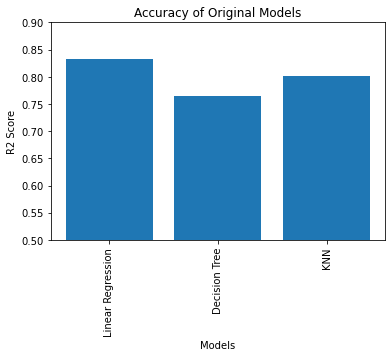

In [542]:
# Show Original R2 Scores of the models 
r2_orig = np.array(r2_orig)
models = ['Linear Regression', 'Decision Tree', 'KNN']
plt.title('Accuracy of Original Models')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.bar(models, r2_orig)
plt.ylim([0.5, 0.9])
plt.xticks(rotation = 'vertical')
plt.show()

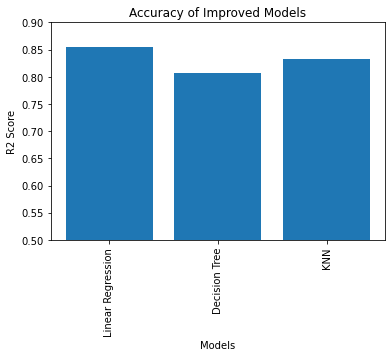

In [543]:
#Models after Improvements 

r2 = np.array(r2)
models = ['Linear Regression', 'Decision Tree', 'KNN']
plt.title('Accuracy of Improved Models')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.bar(models, r2)
plt.ylim([0.5, 0.9])
plt.xticks(rotation = 'vertical')
plt.show()

# The Linear Regression Model was our most accurate model

In [544]:
# Show the percentage in improvements 
data = {'R2_Original': r2_orig,'R2_Improved': r2}
improved_r2 = pd.DataFrame(data, index=models)
improved_r2['Improvement %'] = ( improved_r2['R2_Improved'] - improved_r2['R2_Original'] ) * 100
improved_r2

,R2_Original,R2_Improved,Improvement %
Linear Regression,0.833617,0.854340,2.072320
Decision Tree,0.764645,0.807197,4.255173
KNN,0.801548,0.833094,3.154594


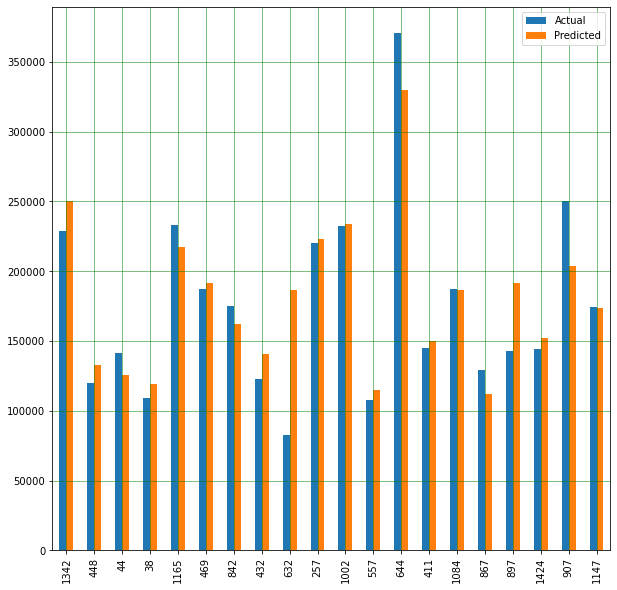

In [545]:
#Visualize how close the predicted vs actual sale prices were  were for Linear Regression Model (our most accurate model)
df = pd.DataFrame({'Actual': y_test_lin, 'Predicted': y_pred_lin})[0:20]
df.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()